In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'iris_dataset.csv', 'KMeansClustering.ipynb', 'One.ipynb', 'OutlierFinding&Standarization.ipynb', 'titanic_dataset.csv']


In [3]:
t_data = pd.read_csv(r"C:\Users\UJ415AV\Desktop\Dipankar\Notes\File\titanic_dataset.csv")
t_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
t_data = t_data.dropna()

In [8]:
t_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [10]:
t_data = t_data.drop(columns=["Cabin"], axis=1)
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 17.2+ KB


In [11]:
t_data.duplicated().sum()
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [12]:
data_dtypes = t_data.dtypes
print(data_dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [13]:
# t_data.Dtype
column_dtypes = t_data.select_dtypes(include=['int64']).columns
print(column_dtypes)
t_data[column_dtypes].head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')


,PassengerId,Survived,Pclass,SibSp,Parch
1,2,1,1,1,0
3,4,1,1,1,0
6,7,0,1,0,0
10,11,1,3,1,1
11,12,1,1,0,0


In [14]:
# t_data.Dtype
column_dtypes = t_data.select_dtypes(include=['float']).columns
print(column_dtypes)
t_data[column_dtypes].head(5)

Index(['Age', 'Fare'], dtype='object')


,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500


In [15]:
# t_data.Dtype
column_dtypes = t_data.select_dtypes(include=['object']).columns
print(column_dtypes)
t_data[column_dtypes].head(5)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
6,"McCarthy, Mr. Timothy J",male,17463,S
10,"Sandstrom, Miss. Marguerite Rut",female,PP 9549,S
11,"Bonnell, Miss. Elizabeth",female,113783,S


male      95
female    88
Name: Sex, dtype: int64


<Axes: >

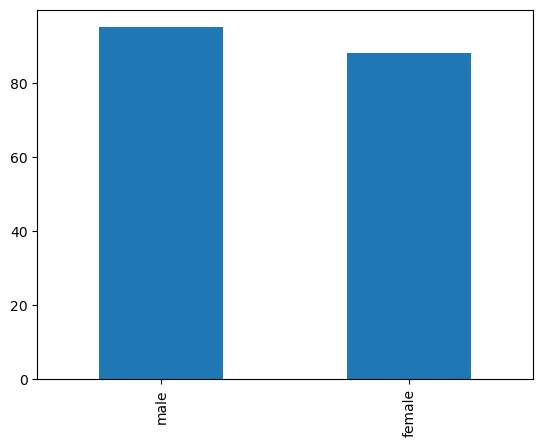

In [16]:
sex_column = t_data["Sex"].value_counts()
print(sex_column)
sex_column.plot(kind='bar')

Sex


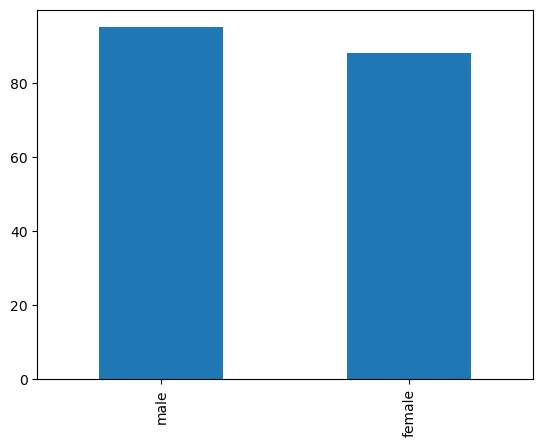


Embarked


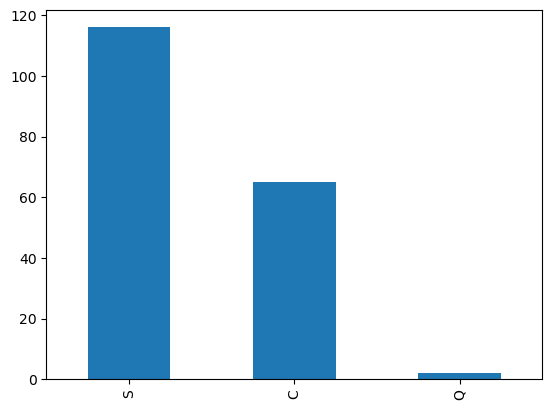

In [17]:
def Func(data):
    obj_data = data.select_dtypes(include=['object']).columns
    # data = data[obj_data]
    for i in obj_data:
        pk = data[str(i)]
        pk = pk.value_counts()
        if (len(pk)<10):
            print(i)
            pk.plot(kind='bar')
            plt.show()
            print()
Func(t_data)

In [18]:
t_data.sort_values("Sex", inplace=True)
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,C
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C
...,...,...,...,...,...,...,...,...,...,...,...
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,S
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,C


In [19]:
t_data.sort_values("Embarked",inplace=True)
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,C
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,S


In [20]:
t_data["Sex"].unique()

array(['female', 'male'], dtype=object)

In [21]:
t_data["Embarked"].unique()

array(['C', 'Q', 'S'], dtype=object)

In [22]:
t_data.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [24]:
t_data.Embarked.unique()

array(['C', 'Q', 'S'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
lc_model = LabelEncoder()
sex_lebel = lc_model.fit_transform(t_data.Sex)
sex_lebel[:5]

array([0, 1, 1, 1, 1])

In [27]:
emb_lebel = lc_model.fit_transform(t_data.Embarked)
emb_lebel[:5]

array([0, 0, 0, 0, 0])

In [28]:
leb_array = ['Sex', "Embarked"]
leb_array = t_data[leb_array].apply(lc_model.fit_transform)
leb_array

,Sex,Embarked
1,0,0
789,1,0
659,1,0
679,1,0
681,1,0
...,...,...
540,0,2
230,0,2
251,0,2
867,1,2


In [29]:
ohe_lebel = OneHotEncoder()
sex_data = np.array(t_data['Sex']).reshape((-1,1))
sex_lebel = ohe_lebel.fit_transform(sex_data)
sex_lebel = sex_lebel.toarray()
sex_lebel = ohe_lebel.inverse_transform(sex_lebel)
print(sex_lebel[:5])

[['female']
 ['male']
 ['male']
 ['male']
 ['male']]


In [30]:
ohe_lebel = OneHotEncoder()
sex_data = np.array(t_data[['Sex', "Embarked"]]).reshape((-1,1))
sex_lebel = ohe_lebel.fit_transform(sex_data)
sex_lebel = sex_lebel.toarray()
sex_lebel = ohe_lebel.inverse_transform(sex_lebel)
print(sex_lebel[:5])

[['female']
 ['C']
 ['male']
 ['C']
 ['male']]


In [31]:
from sklearn.preprocessing import LabelEncoder
lc_model = LabelEncoder()
sex_lebel = lc_model.fit_transform(t_data["Sex"])
from keras.utils import to_categorical
sex_lebel = to_categorical(sex_lebel,num_classes=2)
sex_lebel

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
text = CountVectorizer(ngram_range=(1,1)).fit_transform(t_data['Name']).toarray()
print(text.shape)

(183, 447)


In [34]:
text = TfidfVectorizer(ngram_range=(2,3)).fit_transform(t_data['Name']).toarray()
print(text.shape)

(183, 990)


                                                    -:END:-